<a href="https://colab.research.google.com/github/jjain0811/Comprehensive-Survey-on-Techniques-of-Topic-Evolution-Mining/blob/main/tweetsentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/Research Project 20-21/Datasets/Pulwama Original Tweets")

**Downloading The Dependency Libraries**



---




In [ ]:
# !pip install transformers==4.0.0
# !pip install torch==1.7.1
# !pip install ktrain



In [ ]:
import tensorflow as tf
import ktrain
from ktrain import text

**Calling the Trained Bert Model**

---



In [ ]:
predictor_load = ktrain.load_predictor('bert2')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


ValueError: ignored

**Loading The File having the Tweets With Cluster**

In [ ]:
import json
with open("final_tweet_cluster.json","r") as file:
  clust = json.load(file)

In [ ]:
total = 0
for i in clust:
  print(i, len(clust[str(i)]))
  total += len(clust[str(i)])
print(total)

0 26070
4 3409
2 49921
3 9016
1 5959
94375


In [ ]:
clust['0']

["No more bloodshed, it's time to make them bleed.\n#Pulwama #PulwamaAttack #KashmirTerrorAttack \n#KashmirAttack https://t.co/NwnT42DKyC",
 'RT @knowthenation: Our thoughts go out to the families of the brave martyrs who lost their lives in the #KashmirTerrorAttack. Their sacrifi…',
 'RT @Dibya_Pratim95: RIP my dear neighbor Ananta Da! I salute your selfless sacrificed. \n#Pulwama https://t.co/5Pasxv4OvT',
 'RT @BDUTT: Word from Srinagar is that number of soldiers martyred in #Pulwama is feared to be much higher than we thought earlier. Shudderi…',
 '@INCIndia @RahulGandhi इसे क्या कहोगे ????????\n#AbBadlaLo \n#पुलवामा_आतंकी_हमला \n#Pulwama \n#PulwamaAttack… https://t.co/GPgKOITyCm',
 "RT @legend_celeb: Put local politics aside...\nLet's bring a STABLE govt again in the centre👍\n\nDon't give a chance...\n\n#Pulwama",
 'RT @ysjagan: I strongly condemn this cowardly attack on @crpfindia convoy in #Pulwama and stand in solidarity with our brave soldiers. My h…',
 'RT @MyFellowIndians: Wh

**Using Regex to CLean the Tweets**

In [ ]:
import re
#re.sub(r"(?:@|#\S*|http(?=.*://)\S*)", "", j['text'])
print(clust["0"][3]+"\n", re.sub(r"(?:@|#|http(?=.*://)\S*)", "",clust["0"][9]))

RT @BDUTT: Word from Srinagar is that number of soldiers martyred in #Pulwama is feared to be much higher than we thought earlier. Shudderi…
 SushmaSwaraj Respected Mam Feeling sad 4 Pulwama incident &amp; as V mourn for our martyred soldiers, every Indian's… 


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentence = re.sub(r"(?:@|#|http(?=.*://)\S*)", "",clust["0"][9])
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(sentence)

In [ ]:
# from textblob import TextBlob
# TextBlob(sentence).sentiment

In [ ]:
!pip3 install flair
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

     |████████████████████████████████| 450kB 5.4MB/s 
     |████████████████████████████████| 983kB 8.2MB/s 
     |████████████████████████████████| 19.7MB 1.3MB/s 
     |████████████████████████████████| 798kB 36.7MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 1.3MB 47.1MB/s 
     |████████████████████████████████| 1.1MB 49.2MB/s 
     |████████████████████████████████| 2.9MB 33.1MB/s 
     |████████████████████████████████| 890kB 50.3MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=dfe22ee391c7a29d8fb571b33d0c59bcb2234d034c3b5bf9ed7e917574af817e
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
  Created wheel for sqlitedict: filename=sqlitedict-1.7.0-cp36-none-any.whl size=14376 sha256=e4bc3a5871394a7e349818e8064bbc55c67c4904ecd0edb0f1ab6a46ebb07bf3
  Stored in directory: /root/.cache/pip/wheels/cf/c6/4f/2c64a43f041415eb8b

100%|██████████| 266147697/266147697 [00:11<00:00, 23596474.97B/s]

2021-01-19 11:43:31,220 copying /tmp/tmpw3ip1an3 to cache at /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


2021-01-19 11:43:32,460 removing temp file /tmp/tmpw3ip1an3
2021-01-19 11:43:33,320 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [ ]:
# s = flair.data.Sentence(sentence)
# flair_sentiment.predict(s)
# total_sentiment = s.labels
# total_sentiment[0].to_dict()

In [ ]:
dict = {}

for i in clust:
  print(i)
  dict[i] = {"avg" : {}, "tweets": []}
  compound = 0
  neg = 0
  neu = 0
  pos = 0
  polarity = 0
  subjectivity = 0
  flair_score = 0
  count = 0
  for tweet in clust[i]:
    # print(i, count)
    # count+= 1
    tweet_info = {"text" : tweet}
    sentence = re.sub(r"(?:@|#|http(?=.*://)\S*)", "",tweet)
    s = flair.data.Sentence(sentence)
    flair_sentiment.predict(s)
    total_sentiment = s.labels
    sent = total_sentiment[0].to_dict()
    if sent['value'] == 'POSITIVE':
      tweet_info["flair"] = sent["confidence"]
      flair_score += sent["confidence"]
    else:
      tweet_info["flair"] = -sent["confidence"]
      flair_score -= sent["confidence"]
    blob = TextBlob(sentence).sentiment
    tweet_info["blob"] ={
        "polarity" : blob.polarity,
        "subjectivity" : blob.subjectivity,
        }
    polarity += blob.polarity
    subjectivity += blob.subjectivity
    sid = SentimentIntensityAnalyzer()
    score = sid.polarity_scores(sentence)
    tweet_info["nltk"] = score
    compound += score["compound"]
    neg += score["neg"]
    pos += score["pos"]
    neu += score["neu"]
    dict[i]["tweets"].append(tweet_info)
  lent = len(clust[i])
  dict[i]["avg"] = {
      "neg" : neg/lent,
      "pos" : pos/lent,
      "neu" : neu/lent,
      "polarity" : polarity/lent,
      "subjectivity" : subjectivity/lent,
      "flair" : flair_score/lent,
  }


0
4
2


**Predicting the Sentiments of the Tweed using BERT of Each Cluster**

---



In [ ]:
dict_bert = {}

for i in clust:
   print(i)
   li = []
   for tweet in clust[i]:
      sentence = re.sub(r"(?:@|#|http(?=.*://)\S*)", "",tweet)
      print(sentence)
      sentiment=predictor_load.predict(sentence)
      print(sentiment)
      li.append({"tweet":tweet,"sentiment":sentiment})

   dict_bert[i]=li


0
No more bloodshed, it's time to make them bleed.
Pulwama PulwamaAttack KashmirTerrorAttack 
KashmirAttack 
anger
RT knowthenation: Our thoughts go out to the families of the brave martyrs who lost their lives in the KashmirTerrorAttack. Their sacrifi…
sadness
RT Dibya_Pratim95: RIP my dear neighbor Ananta Da! I salute your selfless sacrificed. 
Pulwama 
anger
RT BDUTT: Word from Srinagar is that number of soldiers martyred in Pulwama is feared to be much higher than we thought earlier. Shudderi…
fear
INCIndia RahulGandhi इसे क्या कहोगे ????????
AbBadlaLo 
पुलवामा_आतंकी_हमला 
Pulwama 
PulwamaAttack… 
joy
RT legend_celeb: Put local politics aside...
Let's bring a STABLE govt again in the centre👍

Don't give a chance...

Pulwama
joy
RT ysjagan: I strongly condemn this cowardly attack on crpfindia convoy in Pulwama and stand in solidarity with our brave soldiers. My h…
joy
RT MyFellowIndians: While the terrorist were planning the attack on Pulwama and killed 40 CRPF soldiers, instead of 

KeyboardInterrupt: ignored


**Saving The Tweets with its respective Sentiment**




---



In [ ]:
import json
with open("tweet_sentiments_bert.json" , "w") as file:
  json.dump(dict_bert, file)

In [ ]:
import json

with open("tweet_sentiments_bert.json" , "r") as file:
  dict_bert = json.load(file)

FileNotFoundError: ignored

**Data List**

In [ ]:
dict_bert

NameError: ignored

**Calculating The Overall Sentiment of each Cluster**

---



In [ ]:
overall_senti = {}
for i in dict_bert:
  dict = {}
  for d in dict_bert[i]:
    try:
      dict[d['sentiment']] += 1
    except:
      dict[d['sentiment']] = 1
  overall_senti[i] = dict



In [ ]:
overall_senti

{'0': {'anger': 9642,
  'sadness': 3841,
  'fear': 689,
  'joy': 11181,
  'love': 543,
  'surprise': 174},
 '4': {'sadness': 239,
  'joy': 1581,
  'anger': 1038,
  'fear': 539,
  'surprise': 3,
  'love': 9},
 '2': {'joy': 24090,
  'sadness': 1261,
  'anger': 20412,
  'love': 951,
  'fear': 3009,
  'surprise': 198},
 '3': {'anger': 424,
  'fear': 32,
  'joy': 8387,
  'sadness': 167,
  'love': 5,
  'surprise': 1},
 '1': {'joy': 4547,
  'anger': 1241,
  'surprise': 10,
  'fear': 64,
  'sadness': 86,
  'love': 11}}

**Data Visualization**

*   Pie  Chart Of Sentiment



---



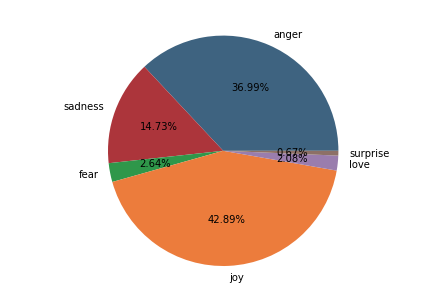

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = overall_senti['0'].keys()
students = overall_senti["0"].values()
ax.pie(students, labels = langs,autopct='%1.2f%%',colors=['#3e6380','#ac353b','#2f974a','#ec7c3c','#9a7dad','#8d7066'])
plt.show()



```
# This is formatted as code
```

**Sentiment of Each of the 5 Cluster**

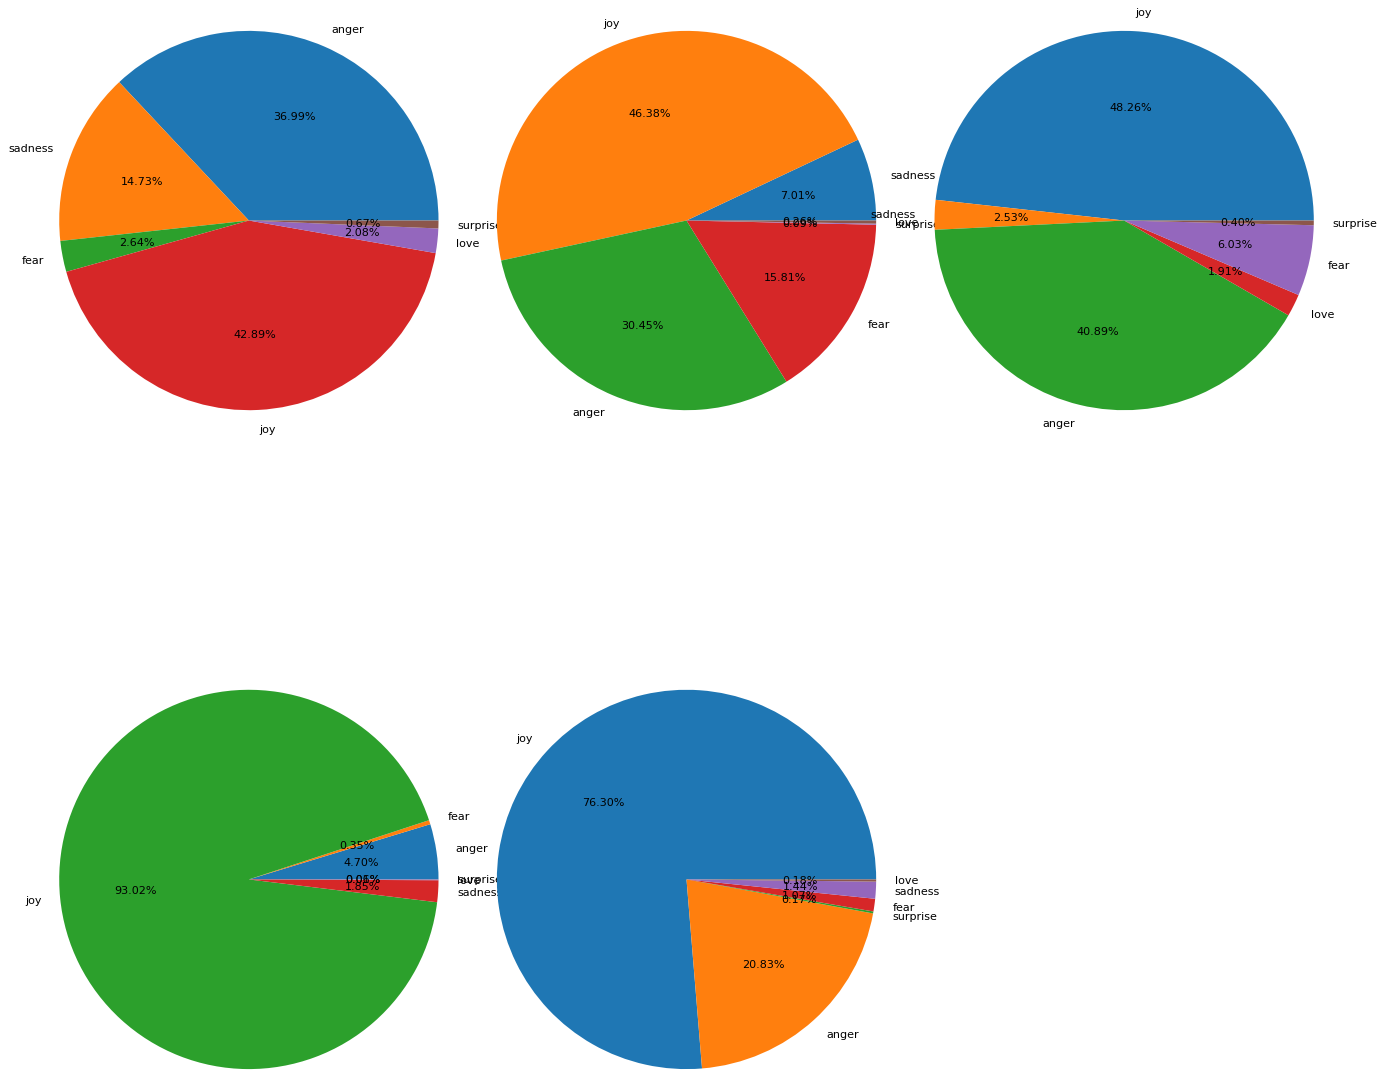

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
#plot 1:
c = 0
for i in overall_senti:
  c += 1
  langs = overall_senti[i].keys()
  students = overall_senti[i].values()
  plt.subplot(2, 3, c)
  plt.pie(students, labels = langs,autopct='%1.2f%%',radius=1.3)

#plot 2:
# x = np.array([0, 1, 2, 3])
# y = np.array([10, 20, 30, 40])

# plt.subplot(1, 2, 2)
# plt.plot(x,y)

plt.show()

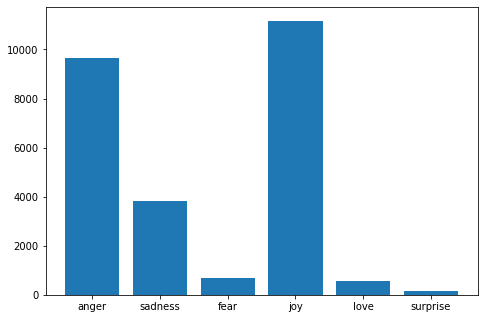

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = overall_senti['0'].keys()
students = overall_senti["0"].values()
ax.bar(langs,students)
plt.show()

  cluster  anger  sadness   fear    joy  love  surprise
0       0   9642     3841    689  11181   543       174
1       4    239     1581   1038    539     3         9
2       2  24090     1261  20412    951  3009       198
3       3    424       32   8387    167     5         1
4       1   4547     1241     10     64    86        11


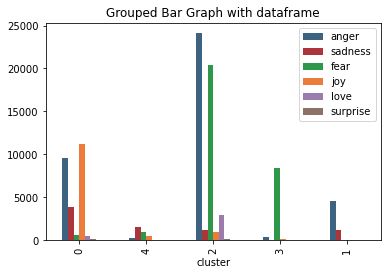

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# create data
li = []
for i in overall_senti:
  lis = [i]
  lis = lis + list(overall_senti[i].values())
  li.append(lis)
columns = ["cluster"] + list(overall_senti['0'].keys())
df = pd.DataFrame(li,
                  columns=columns)
# view data
print(df)

# plot grouped bar chart
df.plot(x='cluster',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe',color=['#3e6380','#ac353b','#2f974a','#ec7c3c','#9a7dad','#8d7066'])

In [ ]:
emotion_dict = {
    'joy':0,
    'fear':0,
    'surprise':0,
    'sadness':0,
    'anger':0,
    'love':0,
}

In [ ]:
li

In [ ]:
import json
with open("tweet_sentiments.json", "r") as file:
  all_tweets = json.load(file)

**Calling the File which Contain all Cluster**

In [ ]:
import json
with open("hashtag_clusters_fp.json", "r") as file:
  ht = json.load(file)

In [ ]:
for i in range(len(ht)):
  print(i, ht[str(i)])

0 ['crpfjawans', 'kashmirterrorattack', 'pulwama', 'pulwamaattack', 'pulwamaterrorattack', 'crpf', 'standwithforces']
1 ['abhinanadanvarthaman', 'abhinandanreturns', 'welcomebackabhinanadan']
2 ['bringbackabhinandan', 'saynototerrorism', 'saynotowar', 'peace', 'pakistanstrikesback', 'abhinandan']
3 ['gobackmodi', 'welcomebackabhinandan']
4 ['india', 'pakistan']


In [ ]:
for i in range(len(dict)):
  print(i, dict[str(i)]["avg"])

## User wise

In [ ]:
import json,os
os.chdir("/content/drive/MyDrive/Research Project 20-21/Datasets/Pulwama Original Tweets")

In [ ]:
import json
with open("/content/drive/MyDrive/Research Project 20-21/Datasets/Pulwama Original Tweets/user_200-400.json", "r") as file:
  user_data = json.load(file)

In [ ]:
ht

{'0': ['crpfjawans',
  'kashmirterrorattack',
  'pulwama',
  'pulwamaattack',
  'pulwamaterrorattack',
  'crpf',
  'standwithforces'],
 '1': ['abhinanadanvarthaman', 'abhinandanreturns', 'welcomebackabhinanadan'],
 '2': ['bringbackabhinandan',
  'saynototerrorism',
  'saynotowar',
  'peace',
  'pakistanstrikesback',
  'abhinandan'],
 '3': ['gobackmodi', 'welcomebackabhinandan'],
 '4': ['india', 'pakistan']}

In [ ]:
print(user_data[list(user_data.keys())[1]])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
keys = list(user_data.keys())

In [ ]:
user_data[keys[0]][0]

{'text': 'RT @rpbreakingnews: 1390 करोड़ फूंके, फिर भी नाले सा हाल\n#patrika #rajasthanpatrika https://t.co/xGwyd9i6Nu',
 'entities': {'hashtags': [{'text': 'patrika', 'indices': [57, 65]},
   {'text': 'rajasthanpatrika', 'indices': [66, 83]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'rpbreakingnews',
    'name': 'rpbreakingnews',
    'id': 1657620379,
    'id_str': '1657620379',
    'indices': [3, 18]}],
  'urls': [],
  'media': [{'id': 1351081760247996416,
    'id_str': '1351081760247996416',
    'indices': [84, 107],
    'media_url': 'http://pbs.twimg.com/media/EsABs94XYAARBxb.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/EsABs94XYAARBxb.jpg',
    'url': 'https://t.co/xGwyd9i6Nu',
    'display_url': 'pic.twitter.com/xGwyd9i6Nu',
    'expanded_url': 'https://twitter.com/rpbreakingnews/status/1351093219745034243/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 680, 'h': 448, 'resize': 'fit'},
   

In [ ]:
import numpy as np
dict = {}
for i in user_data:
  user = {}
  for tweet in user_data[i]:
    for h in tweet["entities"]["hashtags"]:
      count = np.zeros(6)
      for key in range(len(ht)):
        if h["text"].lower() in ht[str(key)]:
          count[key] += 1
          break
    di = {}
    cluster = np.argmax(count)
    if count[cluster] != 0:
      try:
        user[str(cluster)].append(tweet)
      except:
        user[str(cluster)] = [tweet]
  dict[i] = user



In [ ]:
dict

{'707605873858711552': {'4': [{'text': 'RT @news24tvchannel: पाकिस्तान में सरकार के खिलाफ प्रदर्शन, सड़कों पर लोगों के हाथों में दिखी प्रधानमंत्री मोदी की तस्वीर..\n\n#Pakistan #PMM…',
    'entities': {'hashtags': [{'text': 'Pakistan', 'indices': [125, 134]}],
     'symbols': [],
     'user_mentions': [{'screen_name': 'news24tvchannel',
       'name': 'News24',
       'id': 34206701,
       'id_str': '34206701',
       'indices': [3, 19]}],
     'urls': []},
    'favourite_count': 0,
    'retweet_count': 37,
    'retweeted_status': False},
   {'text': 'RT @ZeeNews: लश्कर-ए-तैयबा के कमांडर जकी उर रहमान लखवी को पाकिस्तान में एक बार फिर गिरफ्तार कर लिया गया है\n\n#ZakiUrRehmanLakhvi #Pakistan…',
    'entities': {'hashtags': [{'text': 'ZakiUrRehmanLakhvi',
       'indices': [108, 127]},
      {'text': 'Pakistan', 'indices': [128, 137]}],
     'symbols': [],
     'user_mentions': [{'screen_name': 'ZeeNews',
       'name': 'Zee News',
       'id': 461841349,
       'id_str': '461841349',
   

**Filtering The User**

In [ ]:
filtered = {}
count = 0
for i in dict:
  sum = 0
  for j in dict[i]:
    sum += len(dict[i][j])
  if sum > 10:
    count += 1
    # print(i, dict[i])
    filtered[i] = dict[i]
print(count)

87


In [ ]:
filtered[i]

{'0': [{'text': 'RT @writer_avi: Writer - Avi\n\n#PulwamaAttack https://t.co/M0DgO8GG03',
   'entities': {'hashtags': [{'text': 'PulwamaAttack', 'indices': [30, 44]}],
    'symbols': [],
    'user_mentions': [{'screen_name': 'writer_avi',
      'name': 'Avi',
      'id': 1091012009162928129,
      'id_str': '1091012009162928129',
      'indices': [3, 14]}],
    'urls': [],
    'media': [{'id': 1096475654365810688,
      'id_str': '1096475654365810688',
      'indices': [45, 68],
      'media_url': 'http://pbs.twimg.com/media/Dzd2zFtWkAA93qI.jpg',
      'media_url_https': 'https://pbs.twimg.com/media/Dzd2zFtWkAA93qI.jpg',
      'url': 'https://t.co/M0DgO8GG03',
      'display_url': 'pic.twitter.com/M0DgO8GG03',
      'expanded_url': 'https://twitter.com/writer_avi/status/1096475666416107520/photo/1',
      'type': 'photo',
      'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
       'large': {'w': 1080, 'h': 1007, 'resize': 'fit'},
       'small': {'w': 680, 'h': 634, 'resize

In [ ]:
# import json
# dict__= {}
# count_user = 0
# for fi in os.listdir():
#   if "user" in fi and "00" in fi:
#     print(fi)
#     with open(fi, "r") as file:
#       user_data = json.load(file)
#     dict = {}
#     for i in user_data:
#       user = {}
#       for tweet in user_data[i]:
#         count = np.zeros(6)
#         for h in tweet["entities"]["hashtags"]:

#           for key in range(len(ht)):
#             if h["text"].lower() in ht[str(key)]:
#               count[key] += 1
#               break
#         di = {}
#         cluster = np.argmax(count)
#         if count[cluster] != 0:
#           try:
#             user[str(cluster)].append(tweet)
#           except:
#             user[str(cluster)] = [tweet]
#       dict[i] = user
#     for each_user in dict:
#       print(count_user)
#       count_user += 1
#       dict_ = {}
#       for i in dict[each_user]:
#         # print(i)
#         dict_[i] = {"avg" : {}, "tweets": []}
#         compound = 0
#         neg = 0
#         neu = 0
#         pos = 0
#         polarity = 0
#         subjectivity = 0
#         flair_score = 0
#         # count = 0
#         for tweet in dict[each_user][i]:
#           tweet_info = {"text" : tweet["text"], "favourite_count" : tweet["favourite_count"], "retweet_count" : tweet["retweet_count"], "retweeted_status": tweet["retweeted_status"],}
#           sentence = re.sub(r"(?:@|#|http(?=.*://)\S*)", "",tweet["text"])
#           if len(sentence) > 5:
#             s = flair.data.Sentence(sentence)
#             flair_sentiment.predict(s)
#             total_sentiment = s.labels
#             sent = total_sentiment[0].to_dict()
#             if sent['value'] == 'POSITIVE':
#               tweet_info["flair"] = sent["confidence"]
#               flair_score += sent["confidence"]
#             else:
#               tweet_info["flair"] = -sent["confidence"]
#               flair_score -= sent["confidence"]
#             blob = TextBlob(sentence).sentiment
#             tweet_info["blob"] ={
#                 "polarity" : blob.polarity,
#                 "subjectivity" : blob.subjectivity,
#                 }
#             polarity += blob.polarity
#             subjectivity += blob.subjectivity
#             sid = SentimentIntensityAnalyzer()
#             score = sid.polarity_scores(sentence)
#             tweet_info["nltk"] = score
#             compound += score["compound"]
#             neg += score["neg"]
#             pos += score["pos"]
#             neu += score["neu"]
#             dict_[i]["tweets"].append(tweet_info)
#         lent = len(dict[each_user][i])
#         dict_[i]["avg"] = {
#             "neg" : neg/lent,
#             "pos" : pos/lent,
#             "neu" : neu/lent,
#             "polarity" : polarity/lent,
#             "subjectivity" : subjectivity/lent,
#             "flair" : flair_score/lent,
#         }
#       dict__[each_user]=dict_
# with open("userwise_clustered_tweets.json", "w") as file:
#   json.dump(dict__, file)
# len(dict__)

user_0_200
user_40000-400.json
user_200-400.json
user_600_800.json


**User Wise Sentiment Analysis On Each Event**

In [ ]:
# import json
# import numpy as np

# dict__= {}
# count_user = 0
# for fi in os.listdir():
#   if "user" in fi and "00" in fi:
#     print(fi)
#     with open(fi, "r") as file:
#       user_data = json.load(file)
#     dict = {}
#     for i in user_data:
#       user = {}
#       for tweet in user_data[i]:
#         count = np.zeros(6)
#         for h in tweet["entities"]["hashtags"]:

#           for key in range(len(ht)):
#             if h["text"].lower() in ht[str(key)]:
#               count[key] += 1
#               break
#         di = {}
#         cluster = np.argmax(count)
#         if count[cluster] != 0:
#           try:
#             user[str(cluster)].append(tweet)
#           except:
#             user[str(cluster)] = [tweet]
#       dict[i] = user
#     for each_user in dict:
#       print(count_user)
#       count_user += 1
#       dict_ = {}
#       for i in dict[each_user]:
#         # print(i)
#         dict_[i] = {"tweets": []}

#         # count = 0
#         emotion_dict = {
#             'joy':0,
#             'fear':0,
#             'surprise':0,
#             'sadness':0,
#             'anger':0,
#             'love':0,
#         }
#         for tweet in dict[each_user][i]:
#           tweet_info = {"text" : tweet["text"], "favourite_count" : tweet["favourite_count"], "retweet_count" : tweet["retweet_count"], "retweeted_status": tweet["retweeted_status"]}
#           sentence = re.sub(r"(?:@|#|http(?=.*://)\S*)", "",tweet["text"])
#           if len(sentence) > 5:
#             sentiment=predictor_load.predict(sentence)
#             # s = flair.data.Sentence(sentence)
#             # flair_sentiment.predict(s)
#             # total_sentiment = s.labels
#             # sent = total_sentiment[0].to_dict()
#             # if sent['value'] == 'POSITIVE':
#             #   tweet_info["flair"] = sent["confidence"]
#             #   flair_score += sent["confidence"]
#             # else:
#             #   tweet_info["flair"] = -sent["confidence"]
#             #   flair_score -= sent["confidence"]
#             # blob = TextBlob(sentence).sentiment
#             # tweet_info["blob"] ={
#             #     "polarity" : blob.polarity,
#             #     "subjectivity" : blob.subjectivity,
#             #     }
#             # polarity += blob.polarity
#             # subjectivity += blob.subjectivity
#             # sid = SentimentIntensityAnalyzer()
#             # score = sid.polarity_scores(sentence)
#             # tweet_info["nltk"] = score
#             # compound += score["compound"]
#             # neg += score["neg"]
#             # pos += score["pos"]
#             # neu += score["neu"]
#             tweet_info["sentiment"] = sentiment
#             emotion_dict[sentiment] += 1
#             dict_[i]["tweets"].append(tweet_info)
#         lent = len(dict[each_user][i])
#         # print(i)
#         dict_[i]["emotion"] = emotion_dict
#         dict_[i]["length"] = lent

#       dict__[each_user]=dict_
# with open("userwise_clustered_tweets_bert.json", "w") as file:
#   json.dump(dict__, file)
# len(dict__)

In [ ]:
"""
Temporal behaviour
"""
import re
import datetime
import json
count_user = 0
import numpy as np
dict__ = {}
with open("user_5000-5200_.json", "r") as file:
  user_data = json.load(file)
  dict = {}
  for i in user_data:
    user = {}
    for tweet in user_data[i]:
      count = np.zeros(6)
      for h in tweet["entities"]["hashtags"]:

        for key in range(len(ht)):
          if h["text"].lower() in ht[str(key)]:
            count[key] += 1
            break
      di = {}
      cluster = np.argmax(count)
      if count[cluster] != 0:
        try:
          user[str(cluster)].append(tweet)
        except:
          user[str(cluster)] = [tweet]
    dict[i] = user
  for each_user in dict:
    print(count_user)
    count_user += 1
    dict_ = {}
    for i in dict[each_user]:
      # print(i)
      dict_[i] = {"tweets": []}

      # count = 0
      emotion_dict = {
          'joy':0,
          'fear':0,
          'surprise':0,
          'sadness':0,
          'anger':0,
          'love':0,
      }
      for tweet in dict[each_user][i]:
        tweet_info = {"text" : tweet["text"], "favourite_count" : tweet["favourite_count"], "retweet_count" : tweet["retweet_count"], "retweeted_status": tweet["retweeted_status"], "time": datetime.datetime.strptime(tweet["time"], '%Y-%m-%d %H:%M:%S')}
        sentence = re.sub(r"(?:@|#|http(?=.*://)\S*)", "",tweet["text"])
        if len(sentence) > 5:
          sentiment=predictor_load.predict(sentence)
          tweet_info["sentiment"] = sentiment
          emotion_dict[sentiment] += 1
          dict_[i]["tweets"].append(tweet_info)

      dict_[i]["tweets"] = sorted(
        dict_[i]["tweets"],
        key=lambda x: x['time'],
    )
      lent = len(dict[each_user][i])
      # print(i)
      dict_[i]["emotion"] = emotion_dict
      dict_[i]["length"] = lent

    dict__[each_user]=dict_


0


NameError: ignored

In [ ]:
with open("user_temporal_5000_5200.json", "w") as file:
  json.dump(dict__, file, default= str)

In [ ]:
import json
with open("/content/user_temporal_5000_5200.json", "r") as file:
  user_dict = json.load(file)

In [ ]:
user_dict

{'4922836858': {'4': {'tweets': [{'text': '@ANI_news Hope #India remember that this pig @KapilSibal  supported #AIMPLB in favour of #TripleTalaq &amp; #Halala which is against #Muslim Women.',
     'favourite_count': 2,
     'retweet_count': 0,
     'retweeted_status': False,
     'time': '2017-08-02 07:33:37',
     'sentiment': 'joy'},
    {'text': "@TimesNow Hello @Dev_Fadnavis Check infrastructure of #Mumbai it's worst in #India as controlled by extortion goon Uddhav Thackeray",
     'favourite_count': 0,
     'retweet_count': 0,
     'retweeted_status': False,
     'time': '2017-08-03 09:51:44',
     'sentiment': 'sadness'},
    {'text': '@ShefVaidya @idea_cares @ideacellular Worst telecom operator of #India is @ideacellular',
     'favourite_count': 0,
     'retweet_count': 0,
     'retweeted_status': False,
     'time': '2017-08-03 10:20:21',
     'sentiment': 'joy'},
    {'text': '@republic Now @sardesairajdeep @BDUTT @sagarikaghose @RanaAyyub @ShekharGupta @rahulkanwal will be 

**Filtering The User/////**

In [ ]:
length = 0
for i in li:
#   print(i)
  lent = 0
  for key in user_dict[i]:
    lent += user_dict[i][key]["length"]
  if lent > length:
    length = lent
    user = i



In [ ]:
user


'782523644840902656'

**Selecting The Users Whose Tweet on 3 or more Events**

---



In [ ]:
length = 3
li = []
for i in user_dict:
  # if len(user_dict[i].keys()) > length:
  #   li = [i]
  #   length = len(user_dict[i].keys())
  if len(user_dict[i].keys()) == length:
    li.append(i)


In [ ]:
li

['329506411',
 '712908250',
 '748328902448144384',
 '1321767516',
 '3224869773',
 '2251958670',
 '782523644840902656',
 '4873813091',
 '827193577939808256',
 '480143804']

In [ ]:
user_dict["480143804"] #329506411

{'4': {'tweets': [{'text': 'Who needs enemies when these "secular" dimwits are a part of this country! @pbhushan1 @thewire_in The British left our country but sadly left behind divide and rule. And we the people keep falling for this shit! #India https://t.co/8pUiuxo4iK',
    'favourite_count': 0,
    'retweet_count': 0,
    'retweeted_status': False,
    'time': '2018-05-15 07:17:38',
    'sentiment': 'sadness'},
   {'text': 'It\'s funny how singing "Saare Jahan Se Acha" or "Vande Mataram," of your own free will I might add, is "vulgar and demeaning nationalism." #India',
    'favourite_count': 0,
    'retweet_count': 0,
    'retweeted_status': False,
    'time': '2018-05-15 07:24:15',
    'sentiment': 'anger'},
   {'text': 'Rahul Gandhi: "Coca Cola owner sold Shikanji"\nSambhaji Bhide: "Hold my beer!"\n#India https://t.co/tdaX1FlLp7',
    'favourite_count': 1,
    'retweet_count': 0,
    'retweeted_status': False,
    'time': '2018-06-13 02:19:10',
    'sentiment': 'anger'},
   {'tex

In [ ]:
 print(user_dict["782523644840902656"].keys())

dict_keys(['4', '0', '3'])


In [ ]:
import pandas as pd
di = user_dict["480143804"]
panda_list = {d : pd.DataFrame(di[d]['tweets']) for d in di}

**Formatting The Date and Time of the Dataframe**

In [ ]:
# date = date = datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]))
import datetime
for i in panda_list:
  panda_list[i]["time"] = pd.to_datetime(panda_list[i]["time"], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
df = panda_list['0']

In [ ]:
df["end time"] = df.apply(lambda x: x["time"] + datetime.timedelta(days=1), axis = 1)
df

text  favourite_count  \
0  RT @runjhunmehrotra: Time for one more surgica...                0   
1  RT @kanhaiyakumar: News of the cowardly terror...                0   
2  RT @Madan_Chikna: Let's keep aside the politic...                0   
3  RT @ImRo45: Shocked and horrified by what happ...                0   

   retweet_count  retweeted_status                time sentiment  \
0             69             False 2019-02-15 02:22:34     anger   
1           2209             False 2019-02-15 02:36:06   sadness   
2             17             False 2019-02-15 06:13:19     anger   
3           5307             False 2019-02-15 06:14:40  surprise   

             end time  
0 2019-02-16 02:22:34  
1 2019-02-16 02:36:06  
2 2019-02-16 06:13:19  
3 2019-02-16 06:14:40

In [ ]:
import altair as alt
alt.Chart(df).mark_bar().encode(
    x='time',
    x2='end time',
    y='sentiment',
    color=alt.Color('sentiment', scale=alt.Scale(scheme='dark2'))
)

alt.Chart(...)

**Sorting the tweets according to the Time**

In [ ]:
tweets = []
for i in user_dict:
  di = user_dict[i]
  for key in di:
    for tweet in di[key]["tweets"]:
      tweet["cluster"] = key
      tweets.append(tweet)
tweets = sorted(
        tweets,
        key=lambda x: x['time'],
    )


In [ ]:
"""
single user
"""
for key in di:
  for tweet in di[key]["tweets"]:
    tweet["cluster"] = key
    tweets.append(tweet)
tweets = sorted(
        tweets,
        key=lambda x: x['time'],
    )

In [ ]:
import pandas as pd
import datetime
df_new = pd.DataFrame(tweets)
df_new["time"] = pd.to_datetime(df_new["time"], format = '%Y-%m-%d %H:%M:%S')
dt = datetime.datetime.strptime('31 Dec 2018', '%d %b %Y')
df_new = df_new[df_new["time"]>dt]
dt = datetime.datetime.strptime('31 Dec 2020', '%d %b %Y')
df_new = df_new[df_new["time"]<dt]
df_new

text  favourite_count  \
83   Gaganyaan मिशन पर महिला को भेजना चाहता है ISRO...                1   
84   Now the next edition is ready, here have a loo...                2   
85   Andhra Pradesh NH ❤\nThe first PM ever to rece...                1   
86   RT @RevathyNS: Andhra Pradesh NH ❤\nThe first ...                0   
87   CRPF के काफिले पर बड़ा आतंकी हमला, 8 जवान शहीद...                0   
..                                                 ...              ...   
385  #India  🇮🇳  #GirlPower\n\n#womenempowerment ht...                0   
386  RT @reachind_bharat: This Happens only in #Ind...                0   
387  RT @reachind_bharat: This Happens only in #Ind...                0   
388  #NooraKushti\n\nSimilar tactics was seen while...                0   
389  😱😱\n\nWho was that who said, 'Journalists are ...                0   

     retweet_count  retweeted_status                time sentiment cluster  
83               0             False 2019-01-11 08:52:53       joy       4  
84               0             False 2019-01-16 13:23:21       joy       4  
85               1             False 2019-02-09 16:58:42       joy       3  
86             724             False 2019-02-09 20:39:05       joy       3  
87               0             False 2019-02-14 11:42:44       joy       0  
..             ...               ...                 ...       ...     ...  
385              0             False 2020-12-22 16:52:53       joy       4  
386            972             False 2020-12-23 15:32:40       joy       4  
387            972             False 2020-12-24 01:10:26       joy       4  
388              0             False 2020-12-28 17:37:35       joy       4  
389              0             False 2020-12-30 03:02:05   sadness       4  

[307 rows x 7 columns]

In [ ]:
df = pd.DataFrame(tweets)
df["time"] = pd.to_datetime(df["time"], format = '%Y-%m-%d %H:%M:%S')
df

text  favourite_count  \
0    RT @srisrinow: #Peace Ambassador @SriSri meeti...                0   
1    RT @WhiteHouse: Thank you @NarendraModi for a ...                0   
2    RT @AdityaRajKaul: #Pakistan Occupied Kashmir ...                0   
3    RT @MichaelVaughan: The Fact @imVkohli didn't ...                0   
4    फिर भारतीय जवान के शव के साथ की पाकिस्तान ने ऐ...                0   
..                                                 ...              ...   
495  And. What did YOUR UPA Govt did with Bullet Pr...                0   
496  RT @KanchanGupta: ‘We pay taxes’ is NOT a pass...                0   
497  RT @DrNausheenKhan: A woman killed over love m...                0   
498  Mr. COUPTA taken to cleaners again...spreading...                1   
499  RT @dravirmani: #USA is a free democracy, #Ind...                0   

     retweet_count  retweeted_status                time sentiment cluster  
0               65             False 2014-11-19 16:28:37     anger       2  
1             6323             False 2015-01-27 08:12:52       joy       4  
2              353             False 2016-09-29 12:12:54     anger       4  
3              342             False 2016-11-17 09:35:46       joy       4  
4                0             False 2016-11-22 13:22:30      fear       4  
..             ...               ...                 ...       ...     ...  
495              0             False 2021-04-05 16:41:02       joy       0  
496            120             False 2021-04-06 11:50:34     anger       4  
497              4             False 2021-04-07 08:30:42   sadness       4  
498              0             False 2021-04-07 14:18:47     anger       4  
499            237             False 2021-04-08 07:12:17       joy       4  

[500 rows x 7 columns]

In [ ]:
plt.clf()

<Figure size 432x288 with 0 Axes>

## **UserWise Timeline**

ValueError: ignored

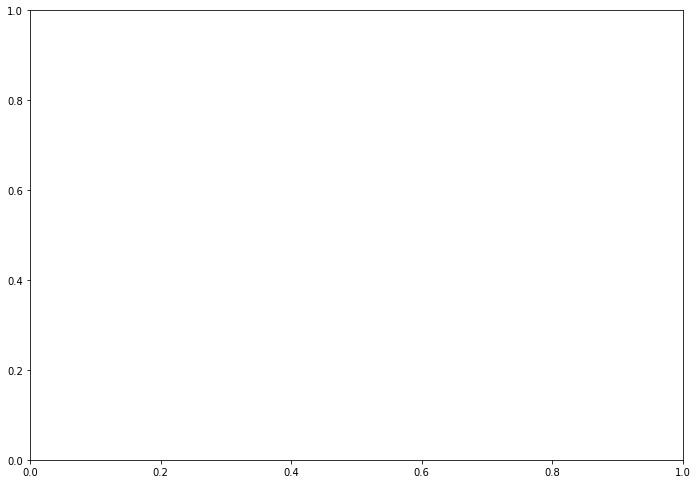

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax.clear()
sns.scatterplot(data=df_new, x="time", y="cluster", hue="sentiment",palette=palette)

In [ ]:
# color={anger="#3e680", joy="#ec7c3c", fear="#2f974a",love='#ac353b', suprise='#9a7dad',sadness='#8d7066'}
color=['#2d6e2c',"#ec7c3c", "#2f974a",'#ac353b', '#9a7dad',"#3e680"]
color2=color=["#8d501d",'#b4262c', '#9a7dad', "#133853",'#8d7066', "#2d6e2c"]

ValueError: ignored

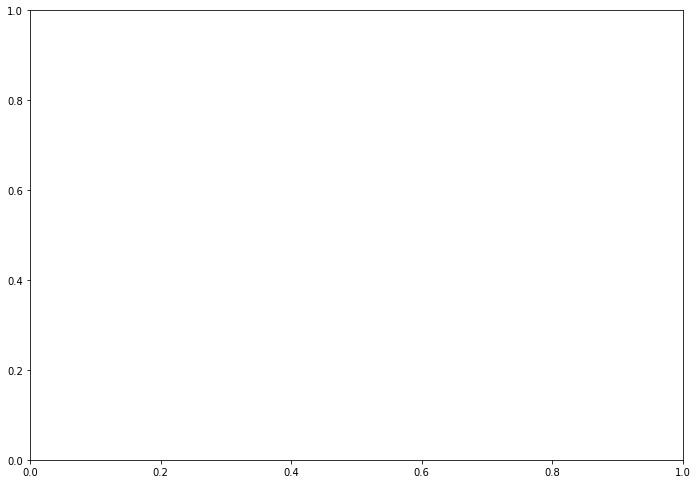

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data=df, x="time", y="cluster", hue="sentiment",palette=palette)
palette=dict(anger="#133853", suprise='#8d7066', joy="#8d501d", fear="#2d6e2c",love='#9a7dad',sadness='#b4262c')

In [ ]:
palette

{'anger': '#3e6380',
 'joy': '#ec7c3c',
 'fear': '#2f974a',
 'love': '#9a7dad',
 'suprise': '#8d7066',
 'sadness': '#ac353b'}

In [ ]:
palette=dict(anger="#3e6380", joy="#ec7c3c", fear="#2f974a",love='#9a7dad', suprise='#8d7066',sadness='#ac353b')
# ['#3e6380','#ac353b','#2f974a','#ec7c3c','#9a7dad','#8d7066']

In [ ]:
df["end time"] = df.apply(lambda x: x["time"] + datetime.timedelta(days=1), axis = 1)
df

text  favourite_count  \
0    RT @srisrinow: #Peace Ambassador @SriSri meeti...                0   
1    RT @WhiteHouse: Thank you @NarendraModi for a ...                0   
2    RT @AdityaRajKaul: #Pakistan Occupied Kashmir ...                0   
3    RT @MichaelVaughan: The Fact @imVkohli didn't ...                0   
4    फिर भारतीय जवान के शव के साथ की पाकिस्तान ने ऐ...                0   
..                                                 ...              ...   
495  And. What did YOUR UPA Govt did with Bullet Pr...                0   
496  RT @KanchanGupta: ‘We pay taxes’ is NOT a pass...                0   
497  RT @DrNausheenKhan: A woman killed over love m...                0   
498  Mr. COUPTA taken to cleaners again...spreading...                1   
499  RT @dravirmani: #USA is a free democracy, #Ind...                0   

     retweet_count  retweeted_status                time sentiment cluster  \
0               65             False 2014-11-19 16:28:37     anger       2   
1             6323             False 2015-01-27 08:12:52       joy       4   
2              353             False 2016-09-29 12:12:54     anger       4   
3              342             False 2016-11-17 09:35:46       joy       4   
4                0             False 2016-11-22 13:22:30      fear       4   
..             ...               ...                 ...       ...     ...   
495              0             False 2021-04-05 16:41:02       joy       0   
496            120             False 2021-04-06 11:50:34     anger       4   
497              4             False 2021-04-07 08:30:42   sadness       4   
498              0             False 2021-04-07 14:18:47     anger       4   
499            237             False 2021-04-08 07:12:17       joy       4   

               end time  
0   2014-11-20 16:28:37  
1   2015-01-28 08:12:52  
2   2016-09-30 12:12:54  
3   2016-11-18 09:35:46  
4   2016-11-23 13:22:30  
..                  ...  
495 2021-04-06 16:41:02  
496 2021-04-07 11:50:34  
497 2021-04-08 08:30:42  
498 2021-04-08 14:18:47  
499 2021-04-09 07:12:17  

[500 rows x 8 columns]

In [ ]:
# from datetime import datetime

# sortedArray = sorted(
#     unsortedArray,
#     key=lambda x: datetime.strptime(x['time'], '%m/%d/%y %H:%M'), reverse=True
# )

In [ ]:
import json
with open("userwise_clustered_tweets_bert.json", "r") as file:
  dict_bert = json.load(file)
dict_bert

{'4650940896': {'4': {'tweets': [{'text': "RT @DrRonMalka: Moved by the visit to the iconic #StatueOfUnity - a majestic view of #India's history, culture &amp; heritage in #Gujarat and p…",
     'favourite_count': 0,
     'retweet_count': 336,
     'retweeted_status': False,
     'sentiment': 'joy'},
    {'text': 'RT @Fay_Alif: Happy Independence Day #India. Ranbir de do Fawad rakh lo.',
     'favourite_count': 0,
     'retweet_count': 1060,
     'retweeted_status': False,
     'sentiment': 'joy'}],
   'emotion': {'joy': 2,
    'fear': 0,
    'surprise': 0,
    'sadness': 0,
    'anger': 0,
    'love': 0},
   'length': 2}},
 '361787439': {'4': {'tweets': [{'text': 'RT @ManeeManjunath: 20. #India is often criticized &amp; ridiculed in international media and among westerners as a poor third world country. B…',
     'favourite_count': 0,
     'retweet_count': 638,
     'retweeted_status': False,
     'sentiment': 'anger'},
    {'text': 'RT @ManeeManjunath: 1. The entire world is looking 

In [ ]:
user_behaviour = {}
for i in dict_bert:
  behaviour = {}
  for clust in dict_bert[i]:
    behaviour[clust] = dict_bert[i][clust]["emotion"]
  user_behaviour[i] = behaviour


In [ ]:
with open("user_behav.json", "w") as file:
  json.dump(user_behaviour, file)

In [ ]:
dict[list(dict.keys())[0]]

In [ ]:
import json
with open("userwise_clustered_tweets.json", "w") as file:
  json.dump(dict__, file)

In [ ]:
len(dict__)

157

In [ ]:
dict__.keys()

dict_keys(['4650940896', '361787439', '244366115', '188651018', '2163051241', '132175493', '1009681431549767681', '233147987', '124689634', '17777374', '45325119', '1094630456077602816', '1960728025', '1016631476606160896', '564872307', '22763833', '579746453', '892714904225931265', '893210025786736640', '53138912', '1244850086', '994182136012902400', '1577818483', '1666873268', '3274817563', '995895483389304832', '902787399259889664', '277326209', '2370515628', '1070662883250331648', '1078183395144781824', '280985386', '485210563', '788714977276329984', '823803127245709314', '960788322594385920', '980816129881907200', '854959096818057217', '3188448042', '259847284', '53026001', '709627805634600960', '617916997', '1070251554676994048', '134119635', '934804205566435328', '831515573037236224', '1072122024603148293', '46349684', '2695419859', '1092718409878364161', '494330272', '815791400944025600', '801689918275719169', '39240673', '1642217455', '1017103696507752448', '897350289254105088

In [ ]:
import json
with open("userwise_clustered_tweets.json", "r") as file:
  user_data = json.load(file)

In [ ]:
len(user_data)

521

In [ ]:
for i in user_data:
  k = user_data[i]
  break
# print(k['4']['tweets'][0]['text'])
k

{'4': {'avg': {'flair': 0.9945256114006042,
   'neg': 0.0,
   'neu': 0.874,
   'polarity': 0.65,
   'pos': 0.126,
   'subjectivity': 0.75},
  'tweets': [{'blob': {'polarity': 0.5, 'subjectivity': 0.5},
    'favourite_count': 0,
    'flair': 0.9980576634407043,
    'nltk': {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
    'retweet_count': 336,
    'retweeted_status': False,
    'text': "RT @DrRonMalka: Moved by the visit to the iconic #StatueOfUnity - a majestic view of #India's history, culture &amp; heritage in #Gujarat and p…"},
   {'blob': {'polarity': 0.8, 'subjectivity': 1.0},
    'favourite_count': 0,
    'flair': 0.9909935593605042,
    'nltk': {'compound': 0.5719, 'neg': 0.0, 'neu': 0.748, 'pos': 0.252},
    'retweet_count': 1060,
    'retweeted_status': False,
    'text': 'RT @Fay_Alif: Happy Independence Day #India. Ranbir de do Fawad rakh lo.'}]}}

In [ ]:
import json
with open("tweet_sentiments.json", "r") as file:
  all_tweets = json.load(file)

In [ ]:
differences = {}
for i in user_data:
  user = user_data[i]
  user_scores = {}
  for cluster in user:
    user_scores[cluster] = {}
    for score in user[cluster]["avg"]:
      diff = user[cluster]["avg"][score] - all_tweets[cluster]["avg"][score]
      user_scores[cluster][score] = diff
  differences[i] = user_scores

In [ ]:
with open("sentiment_differences.json", "w") as file:
  json.dump(differences, file)

In [ ]:
differences